In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "../data/Mouse_metadata.csv"
study_results = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
combined = pd.DataFrame(combined_data)

# Display the data table for preview
combined.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mice = combined_data["Mouse ID"].unique()
drugs = combined_data["Drug Regimen"].unique()
time = combined_data["Timepoint"].unique()

num_mice = len(mice)
num_drugs = len(drugs)
num_measurements = len(time)
num_samples = num_drugs * num_measurements

data_summary = pd.DataFrame({"Number of Mice": [num_mice],
                         "Number of Drug Regimen Treatments": [num_drugs],
                         "Number of Time Measurements": [num_measurements],
                         "Number of Samples": [num_samples]})
data_summary

,Number of Mice,Number of Drug Regimen Treatments,Number of Time Measurements,Number of Samples
0,249,10,10,100


In [61]:
mean_volume = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'],2))
mean_volume = mean_volume.rename(columns={"Tumor Volume (mm3)":"Mean"})

med_volume = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'],2))
med_volume = med_volume.rename(columns={"Tumor Volume (mm3)":"Median"})

variance = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'],2))
variance = variance.rename(columns={"Tumor Volume (mm3)":"Variance"})

stdev = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],2))
stdev = stdev.rename(columns={"Tumor Volume (mm3)":"StDev"})

SEM = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'],2))
SEM = SEM.rename(columns={"Tumor Volume (mm3)":"SEM"})

summary_stat = [mean_volume, med_volume, variance, stdev, SEM]
summary_stat = pd.concat(summary_stat,axis=1,join='inner')
summary_stat

,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [62]:
stat_analysis= pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).describe()['Tumor Volume (mm3)'],2))

stat_analysis

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.68,4.99,23.34,37.69,41.56,45.00,48.16
Ceftamin,178.0,52.59,6.27,45.00,47.21,51.78,56.80,68.92
Infubinol,178.0,52.88,6.57,36.32,47.31,51.82,57.31,72.23
Ketapril,188.0,55.24,8.28,45.00,48.23,53.70,60.87,78.57
Naftisol,186.0,54.33,8.13,45.00,47.29,52.51,59.96,76.67
Placebo,181.0,54.03,7.82,45.00,47.46,52.29,59.92,73.21
Propriva,161.0,52.32,6.51,45.00,47.08,50.85,56.18,72.46
Ramicane,228.0,40.22,4.85,22.05,36.67,40.67,45.00,47.62
Stelasyn,181.0,54.23,7.71,45.00,48.05,52.43,58.72,75.12


## Bar plots

Text(0, 0.5, 'Tumor Vol (mm3)')

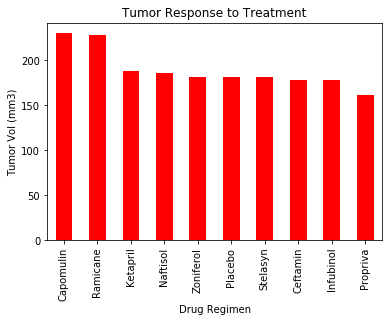

In [79]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

treatment_reg = combined_data["Drug Regimen"].value_counts()
treatment_bar_graph = treatment_reg.plot(kind="bar", facecolor="red")

plt.title('Tumor Response to Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Vol (mm3)')

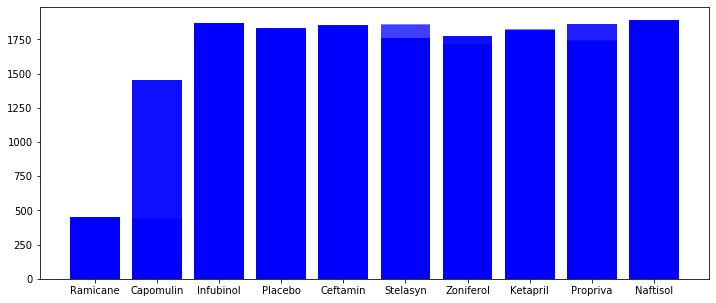

In [81]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(combined_data))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(12,5))
plt.bar(combined_data["Drug Regimen"], x_axis, color='b', alpha=0.5, align="center")
plt.show()

## Pie plots

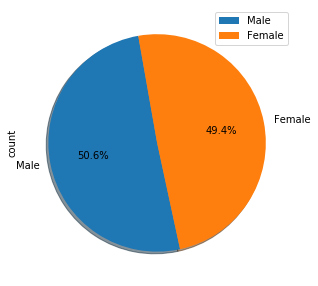

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = pd.DataFrame(combined_data["Sex"].value_counts())
gender_count

gender = pd.DataFrame({'count':[958, 935]},
                   index = ['Male', 'Female'])
gender_pie = gender.plot.pie(y='count', figsize=(5, 5),autopct="%1.1f%%", shadow=True, startangle=100)

C:\Users\siraj\Documents\Conda\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


([<matplotlib.patches.Wedge at 0x1ad98501c88>,
 [Text(-1.0794459321016996, -0.21165178872169474, 'Male'),
  Text(1.0794459321016998, 0.21165178872169366, 'Female')],
 [Text(-0.5887886902372906, -0.11544643021183348, '50.6%'),
  Text(0.5887886902372907, 0.11544643021183289, '49.4%')])

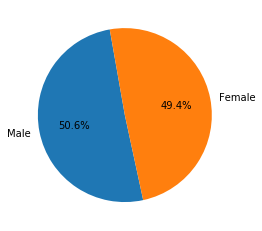

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = pd.DataFrame(combined_data["Sex"].value_counts())
labels = ["Male", "Female"]
explode = (0.1,0)
plt.pie(gender_count, labels=labels, autopct="%1.1f%%", startangle=100)

## Quartiles, outliers and boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# part 1
# Sort data by Drug Regime, Mouse ID and Timepoint
sorted_df = combined_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
# Select final volume of each mouse 
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index() 



,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [68]:
# Convert column "Tumor Volume" of the Capomulin regimen into a dataframe object

cap_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
cap_data_df.head().reset_index()
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Lower quartile of temperatures: {lowerq}")
print(f"Upper quartile of temperatures: {upperq}")
print(f"Interquartile range of temperatures: {iqr}")
print(f"Median of temperatures: {quartiles[0.5]} ")


Lower quartile of temperatures: 32.37735684
Upper quartile of temperatures: 40.1592203
Interquartile range of temperatures: 7.781863460000004
Median of temperatures: 37.31184577 


In [69]:
# part 2

# Select data for Ramicane regimen then reset index
ram_data_df = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
ram_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1


In [70]:
# Convert column "Tumor Volume" of the Ramicane regimen into a dataframe object
ram_list = ram_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]

# Use pandas to calculate

quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Lower quartile of temperatures: {lowerq}")
print(f"Upper quartile of temperatures: {upperq}")
print(f"Interquartile range of temperatures: {iqr}")
print(f"Median of temperatures: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Lower quartile of temperatures: 30.981175224999998
Upper quartile of temperatures: 38.508305307499995
Interquartile range of temperatures: 7.527130082499998
Median of temperatures: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


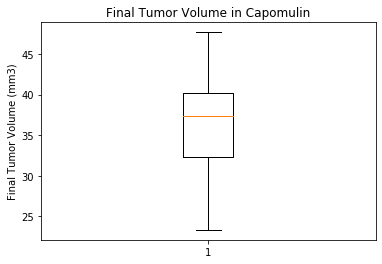

In [71]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest\\
# Outlier plot of final total volume for Capomulin
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

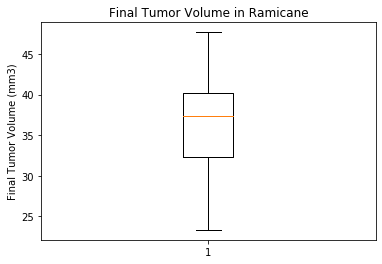

In [72]:
# outlier plot of final total volume for Ramicane
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

## Line and scatter plots

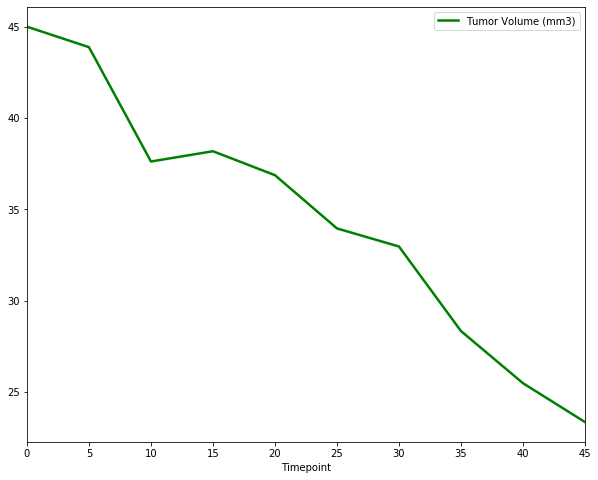

In [73]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
cap_single_df = cap_single_df.reset_index(drop=True)
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='green')


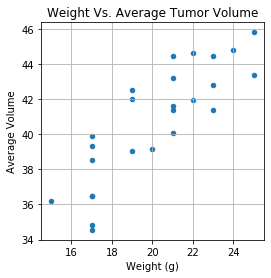

In [74]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap = average_cap.set_index('Mouse ID')
average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")

In [75]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

import matplotlib.pyplot as plt
from scipy.stats import linregress

mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"Correlation between both factors: {round(correlation[0],2)}")



Correlation between both factors: 0.84


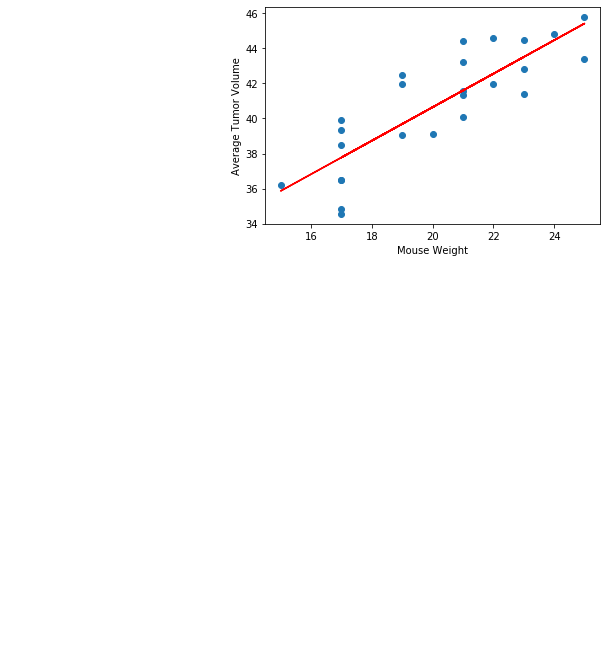

In [76]:

# Add the linear regression equation and line to plot
x_vals = average_cap['Weight (g)']
y_vals = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_vals,y_vals)
plt.plot(x_vals,regress_vals,"r-")
plt.annotate(line_eq,(6,10),fontsize=25,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

In [77]:
#1. Capomulin shows decrease in tumor size
#2. Treatments with Capomulin shows less chances of metastic growth
#3. Weight of the mice increases as tumor size increases.